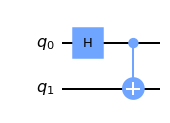

In [4]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw()

In [5]:
def display_unitary(qc, prefix=""):
    """Simulates a simple circuit and display its matrix representation.
    Args:
        qc (QuantumCircuit): The circuit to compile to a unitary matrix
        prefix (str): Optional LaTeX to be displayed before the matrix
    Returns:
        None (displays matrix as side effect)
    """
    from qiskit import Aer
    from qiskit.visualization import array_to_latex
    sim = Aer.get_backend('aer_simulator')
    # Next, we'll create a copy of the circuit and work on
    # that so we don't change anything as a side effect
    qc = qc.copy()
    # Tell the simulator to save the unitary matrix of this circuit
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))

display_unitary(qc, "U_\\text{bell}=")

<IPython.core.display.Latex object>

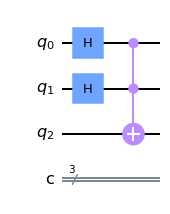

In [6]:
qc = QuantumCircuit(3,3)
qc.h(range(2))
qc.mct([0,1],2)
qc.draw()

In [7]:
def display_unitary(qc, prefix=""):
    """Simulates a simple circuit and display its matrix representation.
    Args:
        qc (QuantumCircuit): The circuit to compile to a unitary matrix
        prefix (str): Optional LaTeX to be displayed before the matrix
    Returns:
        None (displays matrix as side effect)
    """
    from qiskit import Aer
    from qiskit.visualization import array_to_latex
    sim = Aer.get_backend('aer_simulator')
    # Next, we'll create a copy of the circuit and work on
    # that so we don't change anything as a side effect
    qc = qc.copy()
    # Tell the simulator to save the unitary matrix of this circuit
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))

display_unitary(qc, "U_\\text{bell}=")

<IPython.core.display.Latex object>

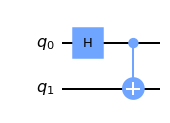

In [8]:
qc = QuantumCircuit(2)
qc.h(0)
qc.mct([0],1)
qc.draw()

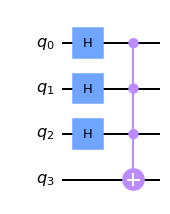

In [9]:
qc = QuantumCircuit(4)
qc.h(range(3))
qc.mct([0,1,2],3)
qc.draw()

In [13]:
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(4)
qc.h(range(3))
qc.mct([0,1,2],3)
qc.draw()
ket = Statevector(qc)
ket.draw(output = 'latex')

<IPython.core.display.Latex object>

In [14]:
display_unitary(qc,"U_\\text{bell}=")

<IPython.core.display.Latex object>

In [15]:
# To mitigate noise

from qiskit import *

nqubits = 3
circuits = QuantumCircuit(nqubits,nqubits)
circuits.h(0)
circuits.cx(0,1)
circuits.cx(1,2)
circuits.measure([0,1,2],[0,1,2])

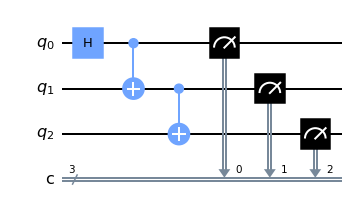

In [16]:
%matplotlib inline
circuits.draw(output='mpl')

In [17]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuits, backend=simulator, shots =1024).result()

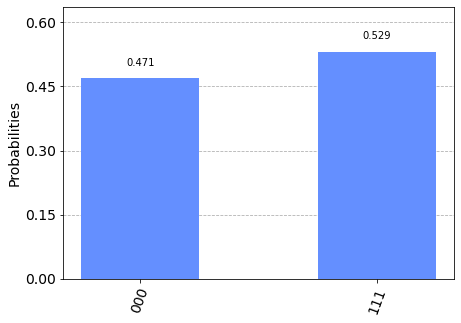

In [18]:
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts(circuits))

In [19]:
# Saving my IBMQ token 
from qiskit import IBMQ

In [20]:
# Now I am ready to access Quantum devices from IBM
IBMQ.save_account('f7ed8b199a6958faaf47b2d6f1a349bb11fb7dec50ce5c5d0edf6e6d7c6b3f568d227dfbefacda6acd0b39a90d06954508892d19d2255e990500f758187fab8a')

configrc.store_credentials:WARNING:2022-10-29 12:27:52,216: Credentials already present. Set overwrite=True to overwrite.


In [21]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [22]:
# Now we will be able to do some computation on real Quantum Computer
# Asking IBM Quantum for it's least busy device that isn't a simulator
from qiskit.providers.ibmq import IBMQ, least_busy
provider = IBMQ.get_provider('ibm-q')
device = least_busy(provider.backends(filters=lambda x: not x.configuration().simulator))
print(f'Running on {device.name()}')

Running on ibm_oslo


In [23]:
# Forming the program so that the device can run it
# It is known as transpiling

from qiskit import  transpile
transpiled_qc = transpile(circuits, device)

In [24]:
# Sending the program off to the IBM Quantum to run on a real device
# and monitoring its status

from qiskit.tools import job_monitor
job = device.run(transpiled_qc)
job_monitor(job)

Job Status: job has successfully run


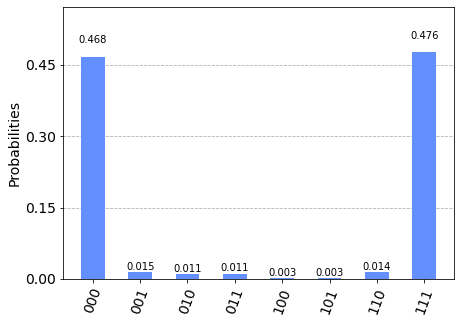

In [25]:
# Plotting the result as histogram
from qiskit.visualization import plot_histogram
plot_histogram(job.result().get_counts())

In [26]:
import numpy as np 
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit 
from qiskit.visualization import plot_histogram
from qiskit_experiments.library import LocalReadoutError, CorrelatedReadoutError

from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator
from qiskit.providers.fake_provider import FakeParis

from qiskit.result.mitigation.utils import (
     expval_with_stddev,
     str2diag,
     counts_probability_vector
)

backend = AerSimulator.from_backend(FakeParis())

/opt/conda/lib/python3.8/site-packages/qiskit/providers/aer/noise/device/models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (78724.73839768364 > 2 * 17977.586136949183). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
/opt/conda/lib/python3.8/site-packages/qiskit/providers/aer/noise/device/models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (151392.40575779957 > 2 * 69749.41874968237). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
/opt/conda/lib/python3.8/site-packages/qiskit/providers/aer/noise/device/models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (78724.73839768364 > 2 * 17977.586136949183). Truncating to maximum value.
  warn("De

In [27]:
SHOTS = 1024
qubits = [0,1,2]
num_qubits = len(qubits)

In [28]:
exp = LocalReadoutError(qubits)

In [29]:
exp.analysis.set_options(plot=True)
result = exp.run(backend)
mitigator = result.analysis_results(0).value

In [30]:
mitigated_quasi_probs = mitigator.quasi_probabilities(counts)
mitigated_stddev = mitigated_quasi_probs._stddev_upper_bound
mitigated_probs = (mitigated_quasi_probs.nearest_probability_distribution().binary_probabilities())

Traceback (most recent call last):
  Input In [30] in <cell line: 1>
    mitigated_quasi_probs = mitigator.quasi_probabilities(counts)
NameError: name 'counts' is not defined

Use %tb to get the full traceback.


In [ ]:
legend = ['Mitigated Probabilities', 'Unmitigated Probabilities']
plot_histogram([mitigated_probs, unmitigated_probs], legend=legend, sort="value_desc", bar_labels=False)